In [ ]:
!wget https://raw.githubusercontent.com/tasdikrahman/datasets/master/email/csv/spam-apache.csv
import numpy as np
import pandas as pd
import nltk 
import matplotlib.pyplot as plt
from sklearn import metrics

nltk.download('stopwords')

pd_data = pd.read_csv("spam-apache.csv", header=None)
test = pd_data.to_numpy()
emails = test[:, 1]
labels = np.array(test[:, 0], dtype='int16')


train_set = test[:250, :]

spam_emails = train_set[train_set[:, 0]==-1, 1]
real_emails = train_set[train_set[:, 0]==1, 1]

bias = np.log(len(spam_emails) / len(real_emails))
test

In [ ]:
labels_indices = np.array((labels+1) / 2, dtype=int)
processed_words = {}

In [ ]:
def processed_Words(size):
  train_set1 = train_set[:size, :]
  labels_indices = np.array((labels+1) / 2, dtype=int)
  processed_words = {}

  for i in range(size):
    label = labels_indices[i]
    words = emails[i].replace(',',' ').replace('.',' ').replace('\n',' ').replace('<br>',' ').split(' ')
    for word in words:
          if(word.isalpha() == True):
            if(word in processed_words):
              processed_words[word][label] += 1
            else:
              processed_words[word] = [0, 0]
              processed_words[word][label] = 1
  #loops through the processed words and applies the probability of each word
  for key in processed_words:
    sum = processed_words[key][0] + processed_words[key][1]
    processed_words[key][0] = processed_words[key][0] / sum
    processed_words[key][1] = processed_words[key][1] / sum
    #removes the possibility of 0 values. 
    if(processed_words[key][0] == 1):
      processed_words[key] = (1,0.00001)
    if(processed_words[key][1] == 1):
      processed_words[key] = (0.00001, 1)

  #goes through the processed words and removes common words.
  stop_Words = nltk.corpus.stopwords.words('english')
  relevant_Words = [word for word in processed_words if word not in stop_Words]

  #goes through processed words and returns words with a useful probability.
  useful_words = {}
  for word in processed_words:
    if (processed_words[word][1] <= 0.4 or processed_words[word][1] >= 0.6):
      useful_words[word] = processed_words[word]
  
  #goes through useful words with probabilty and removes words that aren't useful, EX: or, and, in... and adds it to useful_Relevent_Words.
  useful_Relevent_Words = {}
  for word in useful_words:
    if(word in relevant_Words):
      useful_Relevent_Words[word] = useful_words[word]
  
  #applys baeyes regression
  emails_test = emails[size:]
  projected_Output = np.array(test[size:250, 0], dtype='int16')
  actual_Output = []

  for email in emails_test:
    a = bias
    observed_words=[]
    words = email.replace(',',' ').replace('.',' ').replace('\n',' ').replace('<BR>',' ').split(' ')
    for word1 in words:
      observed_words.append(word1)
      if(word1.isalpha() == True):
        for word in observed_words:
          if word in useful_Relevent_Words:
            a += np.log(useful_Relevent_Words[word][1] / useful_Relevent_Words[word][0])
    actual_Output.append(a)
  return actual_Output

In [ ]:
#changes the value of processed_words to have only 1s and -1s
def Change(a):
  change = a
  Ones = []
  for value in change:
    if (value > 0):
      Ones.append(1)
    if(value < 0):
      Ones.append(-1)
  return Ones

In [ ]:
def Count(a, size):
  actual_Output = a
  projected_Output = np.array(test[size:250, 0], dtype='int16')

  #gets false positive, true positive, false negative, true negative
  true_Positive = 0  
  false_Positive = 0
  true_Negative = 0
  false_Negative = 0

  for i in range(250-size):
    if projected_Output[i] == 1:
      if actual_Output[i] > 0:
        true_Positive += 1
      else:
        false_Negative += 1
    if projected_Output[i] == -1:
      if actual_Output[i] < 0:
        true_Negative += 1
      else:
        false_Positive += 1
  return true_Positive, false_Positive, true_Negative, false_Negative

Sampling size: 50
True Positive: 69
True Negative: 99
False Positive: 1
False Negative: 31
Percent correct: % 84.0


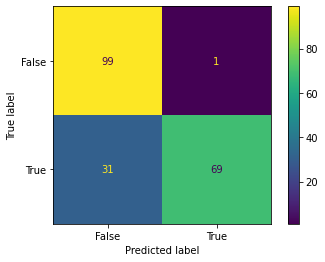

In [ ]:
size1 = 50
projected_Output1 = np.array(test[size1:250, 0], dtype='int16')
value1 = processed_Words(size1)
new_Value1 = Change(value1)
true_Positive1, false_Positive1, true_Negative1, false_Negative1 = Count(value1, size1)
Percent1 = ((true_Positive1+true_Negative1)/(250-size1)*100);


print("Sampling size:", size1)
print("True Positive:", true_Positive1)
print("True Negative:", true_Negative1)
print("False Positive:", false_Positive1)
print("False Negative:", false_Negative1)
print("Percent correct: %", Percent1)

confusion_matrix1 = metrics.confusion_matrix(projected_Output1, new_Value1)

cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = [False, True])

cm_display1.plot()
plt.show()

Sampling size: 100
True Positive: 56
True Negative: 72
False Positive: 1
False Negative: 21
Percent correct: % 85.33333333333334


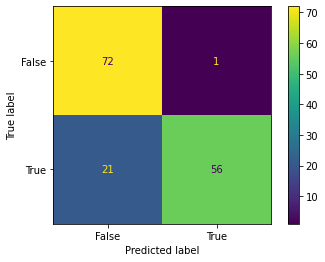

In [ ]:
size2 = 100
projected_Output2 = np.array(test[size2:250, 0], dtype='int16')
value2 = processed_Words(size2)
new_Value2 = Change(value2)
true_Positive2, false_Positive2, true_Negative2, false_Negative2 = Count(value2, size2)
Percent2 = ((true_Positive2+true_Negative2)/(250-size2)*100);


print("Sampling size:", size2)
print("True Positive:", true_Positive2)
print("True Negative:", true_Negative2)
print("False Positive:", false_Positive2)
print("False Negative:", false_Negative2)
print("Percent correct: %", Percent2)

confusion_matrix2 = metrics.confusion_matrix(projected_Output2, new_Value2)

cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [False, True])

cm_display2.plot()
plt.show()

Sampling size: 150
True Positive: 46
True Negative: 46
False Positive: 1
False Negative: 7
Percent correct: % 92.0


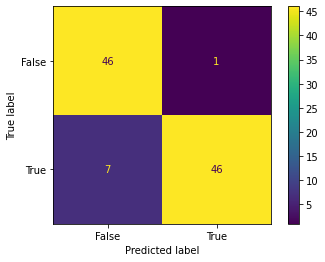

In [ ]:
size3 = 150
projected_Output3 = np.array(test[size3:250, 0], dtype='int16')
value3 = processed_Words(size3)
new_Value3 = Change(value3)
true_Positive3, false_Positive3, true_Negative3, false_Negative3 = Count(value3, size3)
Percent3 = ((true_Positive3+true_Negative3)/(250-size3)*100);


print("Sampling size:", size3)
print("True Positive:", true_Positive3)
print("True Negative:", true_Negative3)
print("False Positive:", false_Positive3)
print("False Negative:", false_Negative3)
print("Percent correct: %",(true_Positive3+true_Negative3)/(250-size3)*100)

confusion_matrix3 = metrics.confusion_matrix(projected_Output3, new_Value3)

cm_display3 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, display_labels = [False, True])

cm_display3.plot()
plt.show()

Sampling size: 200
True Positive: 25
True Negative: 23
False Positive: 1
False Negative: 1
Percent correct: % 96.0


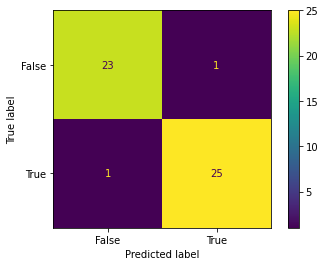

In [ ]:
size4 = 200
projected_Output4 = np.array(test[size4:250, 0], dtype='int16')
value4 = processed_Words(size4)
new_Value4 = Change(value4)
true_Positive4, false_Positive4, true_Negative4, false_Negative4 = Count(value4, size4)
Percent4 = ((true_Positive4+true_Negative4)/(250-size4)*100);


print("Sampling size:", size4)
print("True Positive:", true_Positive4)
print("True Negative:", true_Negative4)
print("False Positive:", false_Positive4)
print("False Negative:", false_Negative4)
print("Percent correct: %", Percent4)
confusion_matrix4 = metrics.confusion_matrix(projected_Output4, new_Value4)

cm_display4 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix4, display_labels = [False, True])

cm_display4.plot()
plt.show()

Sampling size: 221
True Positive: 16
True Negative: 13
False Positive: 0
False Negative: 0
Percent correct: % 100.0


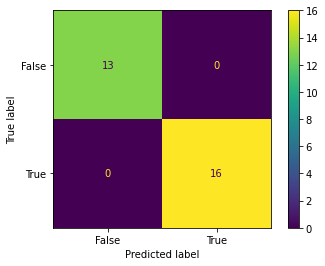

In [ ]:
size5 = 221
projected_Output5 = np.array(test[size5:250, 0], dtype='int16')
value5 = processed_Words(size5)
new_Value5 = Change(value5)
true_Positive5, false_Positive5, true_Negative5, false_Negative5 = Count(value5, size5)
Percent5 = ((true_Positive5+true_Negative5)/(250-size5)*100);


print("Sampling size:", size5)
print("True Positive:", true_Positive5)
print("True Negative:", true_Negative5)
print("False Positive:", false_Positive5)
print("False Negative:", false_Negative5)
print("Percent correct: %", Percent5)

confusion_matrix5 = metrics.confusion_matrix(projected_Output5, new_Value5)

cm_display5 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix5, display_labels = [False, True])

cm_display5.plot()
plt.show()

Text(0, 0.5, 'Percent Correct')

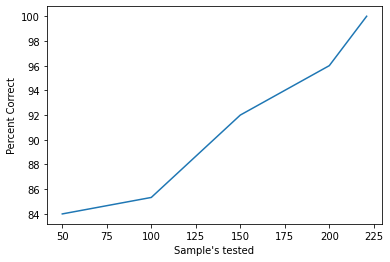

In [ ]:
size = np.array([size1, size2, size3, size4, size5])
percent_Correct = np.array([Percent1, Percent2, Percent3, Percent4, Percent5])

plt.plot(size, percent_Correct)
plt.xlabel("Sample's tested")
plt.ylabel("Percent Correct")